In [5]:
# -*- coding: utf-8 -*-

# stpe1 탐색 : 데이터의 기초 정보 살펴보기

# chipotle 데이터셋의 기초 정보 출력

import pandas as pd

file_path = '../data/chipotle.tsv' # '..' : 한 폴더 위라는 의미(현재 폴더 위의 data 폴더 내의 chipotle.tsv파일을 가리킨다)

# read_csv() 함수를 통해 데이터를 데이터프레임형태로 불러온다
chipo = pd.read_csv(file_path, sep = '\t') # 파일경로, 옵션 설정(tab을 제거하고 데이터 읽어오기)

print(chipo.shape) # 데이터의 행, 열 크기
print("===========================================================================================================")
print(chipo.info()) # 데이터의 행, 열의 구성 정보

(4622, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


In [7]:
# 실행 결과를 통해,,
# 데이터가 4,622개의 행과 5개의 피처로 구성되어 있음을 알 수 있다
# 또한 order_id, quantity는 int64(숫자)
# 나머지 3개의 피처는 object 타입으로 이루어져있음을 알 수 있다
# 특이한 것은 choice_description 피처가 3,376개의 non-null object로 구성되어 있다는 것!
# 어떤 의미?

# 데이터 프레임에서 object 타입은 일반적으로 '문자열'을 의미한다
# 그리고 null 이라는 용어는 데이터가 비어 있는 것을 의미 == '결측값'
# 즉, 3376 non-null object 라는 것은 3,376개의 비어 있지 않은 문자열 데이터가 있다는 정보이다
# 하지만, 데이터의 개수는 4,622개이므로 choice_desription 피처는 1,246개의 결측값이 존재함을 의미한다

In [10]:
# 다음 코드
# head(10) 함수는 첫 10개의 데이터를 테이블 형태로 출력한다 
# 또한 columns(행의 목록)과 index(열의 목록)를 호출하면 데이터의 행과 열에 대한 정보를 함께 출력할 수 있다

chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [9]:
print(chipo.columns)
print("===========================================================================================================")
print(chipo.index)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
RangeIndex(start=0, stop=4622, step=1)


In [16]:
# chipotle 데이터셋 피처의 의미는 각각 다음과 같다
# order_id : 주문 번호
# quantity : 아이템의 주문 수량
# item_name : 주문한 아이템의 이름
# choice_description : 주문한 아이템의 상세 선택 옵션
# item_price : 주문 아이템의 가격 정보

In [17]:
# quantity와 item_price의 수치적 특징

# 이 두 피처는 연속형 피처이다
# 연속형 피처는 키와 몸무게처럼 어떠한 값도 가질 수 있는 연속적인 숫자 형태를 의미한다


# 피처 형태의 종류
# 수치형 피처(Numerical Feature) , 범주형 피처(Categorical Feature)

# 수치형 피처에는
# - 연속형 피처 : 어떤 구간 안의 모든 값을 데이터로서 가질 수 있다(e.g. 키, 몸무게)
# - 비연속형 피처 : 셀 수 있으며, 일정 구간 안에서 정해진 몇 개의 값을 가져야 한다(e.g. 나이)

# 범주형 피처에는
# - 순서 있는 범주형 피처 : 순서가 있으나, 수치는 아니다(e.g. 학점(A, B, ..., F))
# - 순서 없는 범주형 피처 : 데이터가 구분되면서도 순서가 없다(e.g. 혈액형)

In [12]:
# 아래 코드는 describe() 함수를 통해 나타낸 피처의 기초 통계량
# 현재 데이터에서 유일한 수치형 피처는 quantity 뿐(가격은 object)
# 따라서 describe()로는 quantity에 대한 정보만을 출력할 수 있다

# order_id는 숫자의 의미를 가지지 않기 때문에 str으로 변환한다
chipo['order_id'] = chipo['order_id'].astype(str)

print(chipo.describe()) # chipo 데이터 프레임에서 수치형 피처들의 기초 통계량을 확인

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


In [13]:
# 아이템의 평균 주문 수량(mean) : 약 1.07
# - 대부분이 한 아이템에 대해 1개 정도만 주문 == '한 사람이 같은 메뉴를 여러 개 구매하는 경우는 많지 않다' 라는 인사이트를 얻을 수 있음

# 그렇다면 item_price의 수치적 특징은 어떻게 알아볼까
# 현재 item_price 피처는 object 타입이기 때문에 describe() 함수로 기초 통계량을 확인할 수가 없다
# 이를 위해서는 추가적인 데이터 전처리 작업이 필요(step3 에서)

In [15]:
# order_id와 item_name의 개수 탐색
# 이 두 피처는 범주형 피처이기 때문에 unique() 함수를 사용한다
# 이를 통해 피처 내에 몇 개의 범주가 있는지를 확인할 수 있다

print(len(chipo['order_id'].unique())) # order_id의 개수를 출력
print(len(chipo['item_name'].unique())) # item_name의 개수를 출력

1834
50


In [23]:
# 인사이트의 발견 : 탐색과 시각화

# 가장 많이 주문한 아이템 Top 10
# 이를 분석하기 위해서는 DataFrame['column'] 의 형태에 value_counts() 함수를 적용한다
# DataFrame['column']은 시리즈 series라는 객체를 반환하는데
# value_counts() 함수는 오로지 이러한 시리즈 객체에만 적용되기 때문이다

# 가장 많이 주문한 아이템 Top 10 출력

item_count = chipo['item_name'].value_counts()[:10] # value_count()만 적으면 자동으로 많이 나온 순서대로 정렬됨
                                                    # [:10] 슬라이싱으로, top10까지 item_count 변수에 저장

# 위의 top10 출력 코드를 조금 더 보기 좋게 만드는 코드
for idx, (val, cnt) in enumerate(item_count.iteritems(), 1): # 1: index 1부터 시작하는 옵션
                                                             # iteritems()는 '키'와 '값'의 쌍을 iterator(반복자)로 반환한다
    print("Top", idx, ":", val, cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Steak Bowl 211
Top 7 : Chips 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


In [28]:
# 아이템별 주문 개수와 총량

# groupby() 함수를 이용하여 아이템별 주문 개수와 총량을 구해보자
# groupby() 함수는 데이터 프레임에서 특정 피처를 기준으로 그룹을 생성하며
# 이를 통해 그룹별 연산을 적용할 수 잇다
# 예를 들어 '학급'이라는 그룹을 만들었을 때, '학급별 평균 키', '학급별 평균 몸무게' 등을 구하는 것처럼

# 아이템별 주문 개수 출력
order_count = chipo.groupby('item_name')['order_id'].count()
order_count[:10]

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [17]:
# 아이템별 주문 총량 계산

item_quantity = chipo.groupby('item_name')['quantity'].sum()
# item_quantity[:10]
item_quantity

item_name
6 Pack Soft Drink                         55
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     12
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            211
Bowl                                       4
Burrito                                    6
Canned Soda                              126
Canned Soft Drink                        351
Carnitas Bowl                             71
Carnitas Burrito                          60
Carnitas Crispy Tacos                      8
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             761
Chicken Burrito                          591
Chicken Crispy Tacos                      50
Chicken Salad                              9
Chicken Salad Bowl                       123


In [30]:
# chipo.groupby('item_name')['order_id'].count()는 chipo DataFrame에서 item_name을 그룹으로 quantity 피처의 count()를 계산
# 이는 아이템별 주문 개수를 의미한다

# chipo.groupby('item_name')['quantity'].sum()은 아이템 주문 총량을 나타낸다

item_name_list
['6 Pack Soft Drink', 'Barbacoa Bowl', 'Barbacoa Burrito', 'Barbacoa Crispy Tacos', 'Barbacoa Salad Bowl', 'Barbacoa Soft Tacos', 'Bottled Water', 'Bowl', 'Burrito', 'Canned Soda', 'Canned Soft Drink', 'Carnitas Bowl', 'Carnitas Burrito', 'Carnitas Crispy Tacos', 'Carnitas Salad', 'Carnitas Salad Bowl', 'Carnitas Soft Tacos', 'Chicken Bowl', 'Chicken Burrito', 'Chicken Crispy Tacos', 'Chicken Salad', 'Chicken Salad Bowl', 'Chicken Soft Tacos', 'Chips', 'Chips and Fresh Tomato Salsa', 'Chips and Guacamole', 'Chips and Mild Fresh Tomato Salsa', 'Chips and Roasted Chili Corn Salsa', 'Chips and Roasted Chili-Corn Salsa', 'Chips and Tomatillo Green Chili Salsa', 'Chips and Tomatillo Red Chili Salsa', 'Chips and Tomatillo-Green Chili Salsa', 'Chips and Tomatillo-Red Chili Salsa', 'Crispy Tacos', 'Izze', 'Nantucket Nectar', 'Salad', 'Side of Chips', 'Steak Bowl', 'Steak Burrito', 'Steak Crispy Tacos', 'Steak Salad', 'Steak Salad Bowl', 'Steak Soft Tacos', 'Veggie Bowl', 'Veggie

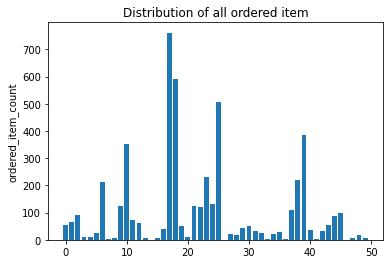

In [35]:
# 시각화

# 아이템별 주문의 총량을 막대그래프로 시각화해 볼 수 있다
# 코드에서 tolist()와 넘파이의 arrange() 함수를 이용하여 x_pos를 선언,
# 0 ~ 50 까지의 숫자를 그래프의 x축 이름으로 사용
# 그 이유는 50개의 아이템의 이름을 x축에 표현하기에는 공간이 너무 협소
# y값(order_cnt)에는 주문 총량에 해당하는 값인 
# item_quantity.values.tolist()를 넣어준다

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

item_name_list = item_quantity.index.tolist() # index를 list로 출력
                                              # 그냥 tolist 하니까 주문 총량이 나오고 index.tolist 하니까 item name이 나옴
                                              # item_quantity의 index == item_name 
print("item_name_list")
print(item_name_list)
print(len(item_name_list))

x_pos = np.arange(len(item_name_list)) # 총 50가지 item, numpy 형태로 배열 생성(0부터 49)

# np.arange
# np.arange(3) -> array([0, 1, 2])
# np.arange(3.0) -> array([0., 1., 2.])
# np.arange(3,7) -> array([3, 4, 5, 6])
# np.arange(3,7,2) -> array([3, 5])


order_cnt = item_quantity.values.tolist() 

print(order_cnt)

plt.bar(x_pos, order_cnt, align = 'center') # plt.bar(x축, y축, )
plt.ylabel('ordered_item_count')
plt.title('Distribution of all ordered item')

plt.show()

In [16]:
tmp = chipo['item_name'].unique()
print(tmp)
print(len(tmp))

['Chips and Fresh Tomato Salsa' 'Izze' 'Nantucket Nectar'
 'Chips and Tomatillo-Green Chili Salsa' 'Chicken Bowl' 'Side of Chips'
 'Steak Burrito' 'Steak Soft Tacos' 'Chips and Guacamole'
 'Chicken Crispy Tacos' 'Chicken Soft Tacos' 'Chicken Burrito'
 'Canned Soda' 'Barbacoa Burrito' 'Carnitas Burrito' 'Carnitas Bowl'
 'Bottled Water' 'Chips and Tomatillo Green Chili Salsa' 'Barbacoa Bowl'
 'Chips' 'Chicken Salad Bowl' 'Steak Bowl' 'Barbacoa Soft Tacos'
 'Veggie Burrito' 'Veggie Bowl' 'Steak Crispy Tacos'
 'Chips and Tomatillo Red Chili Salsa' 'Barbacoa Crispy Tacos'
 'Veggie Salad Bowl' 'Chips and Roasted Chili-Corn Salsa'
 'Chips and Roasted Chili Corn Salsa' 'Carnitas Soft Tacos'
 'Chicken Salad' 'Canned Soft Drink' 'Steak Salad Bowl'
 '6 Pack Soft Drink' 'Chips and Tomatillo-Red Chili Salsa' 'Bowl'
 'Burrito' 'Crispy Tacos' 'Carnitas Crispy Tacos' 'Steak Salad'
 'Chips and Mild Fresh Tomato Salsa' 'Veggie Soft Tacos'
 'Carnitas Salad Bowl' 'Barbacoa Salad Bowl' 'Salad' 'Veggie Cris

In [26]:
a = np.arange(50)
print(a)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
